In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)
ds.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
ds1=ds.drop(['ID','ZIP Code'],axis=1)
ds1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [5]:
ds1.shape

(5000, 12)

In [6]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [7]:
ds1.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
ds1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


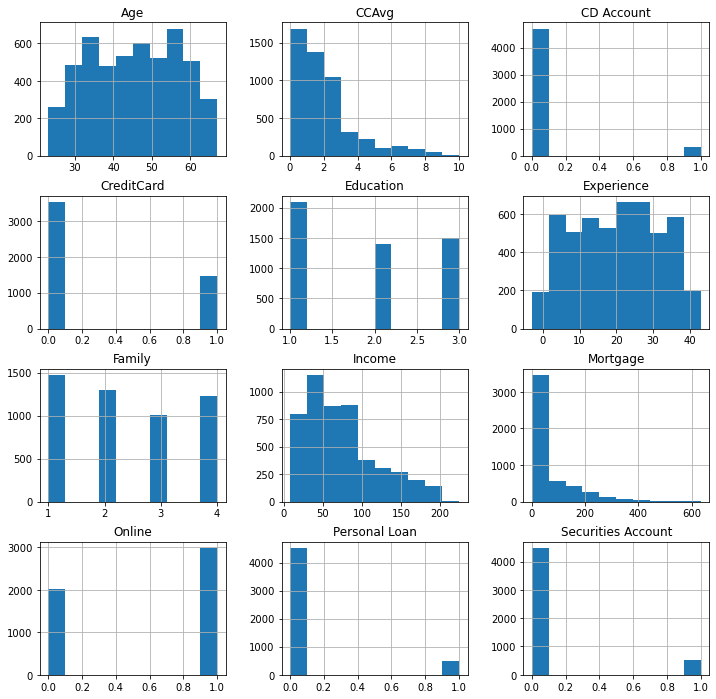

In [9]:
ds1.hist(figsize=(12,12))
plt.show()

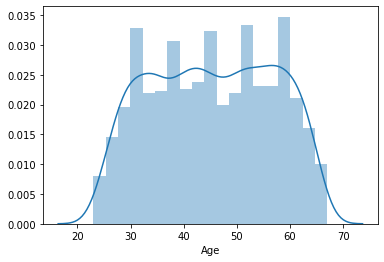

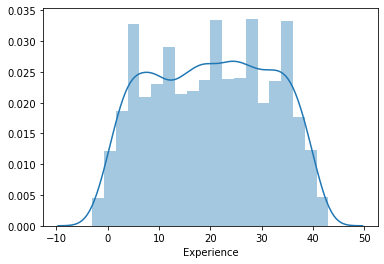

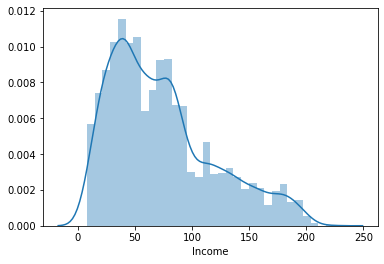

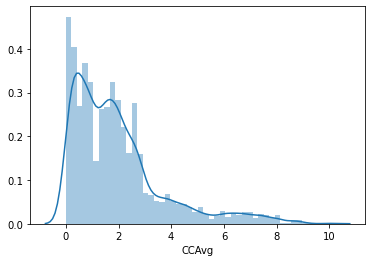

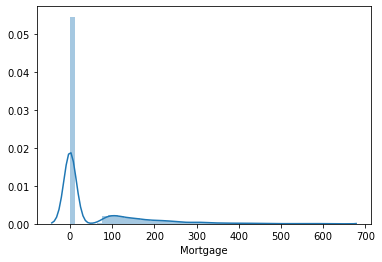

In [10]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in columns:
    sns.distplot(ds1[col])
    plt.show()

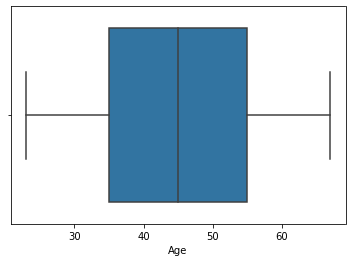

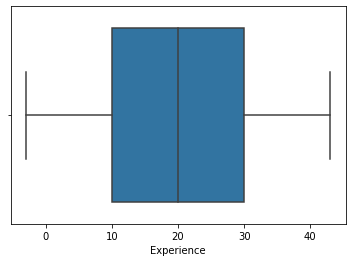

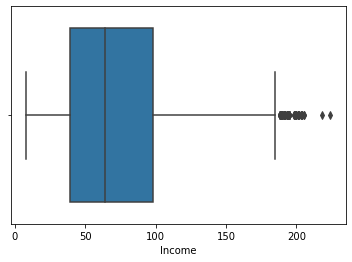

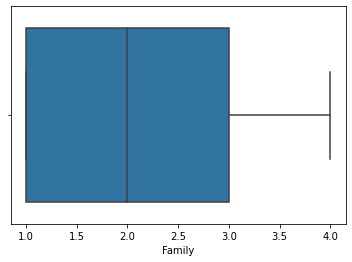

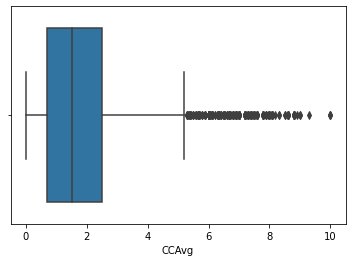

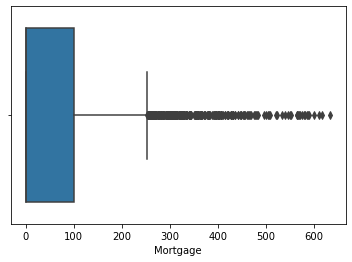

In [11]:
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for col in columns:
    sns.boxplot(ds1[col])
    plt.show()

In [37]:
from sklearn import tree, preprocessing

In [38]:
ds1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [39]:
x = ds1.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [40]:
y = ds1.iloc[:, 7:8]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [41]:
model = tree.DecisionTreeClassifier(max_depth=22)
model.fit(x,y)

DecisionTreeClassifier(max_depth=22)

In [42]:
model.score(x,y)

1.0

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [44]:
rf.fit(x,y)

<ipython-input-44-e151f561c6a5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [45]:
rf.oob_score_

0.9878

In [46]:
for x,imp in zip(x,model.feature_importances_):
    print(x,imp);

Age 0.021512330664459758
Experience 0.021653996727039302
Income 0.3098799570906219
Family 0.15439849639875555
CCAvg 0.05853924947482488
Education 0.39780726541380174
Mortgage 0.00638664866428781
Securities Account 0.0
CD Account 0.01850803835284165
Online 0.00794220849725569
CreditCard 0.003371808716111814


In [48]:
from sklearn import tree
predictors=ds1[['Income','CCAvg','Education']]
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(X=predictors,y=ds1['Personal Loan'])

DecisionTreeClassifier(max_depth=8)

In [49]:
with open('Dtree_loan.dot','w')as f:
    f=tree.export_graphviz(tree_model,feature_names=['Income','CCAvg','Education'],out_file=f);